In [1]:
import torch
%cd yolov5
%pip install -qr requirements.txt 

c:\Users\cvaal\ML2\Automated Fact Checker\image classification\YOLOv5-Classifier\yolov5
Note: you may need to restart the kernel to use updated packages.


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', r'runs\train-cls\exp21\weights\best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\cvaal/.cache\torch\hub\master.zip
YOLOv5  2023-5-20 Python-3.10.11 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1060 6GB, 6144MiB)



requirements: C:\Users\cvaal\anaconda3\envs\torch-gpu-2.0.1\Lib\site-packages\requirements.txt not found, check failed.


Fusing layers... 
Model summary: 117 layers, 4169250 parameters, 0 gradients, 10.4 GFLOPs
WARNING  YOLOv5 ClassificationModel is not yet AutoShape compatible. You must pass torch tensors in BCHW to this model, i.e. shape(1,3,224,224).


In [3]:
torch.save(model, r'C:\Users\cvaal\ML2\Automated Fact Checker\image classification\YOLOv5-Classifier\torch-model\image_predictor.pkl')

In [4]:
import os
directory = r'C:\Users\cvaal\ML2\Automated Fact Checker\image classification\YOLOv5-Classifier\datasets\Fake-News-Image-Classifier-5'
sets = 'train'
fake_path = os.path.join(directory, sets, 'fake')
real_path = os.path.join(directory, sets, 'real')
                         
fake_img_paths = [os.path.join(fake_path, img) for img in os.listdir(fake_path)]
real_img_paths = [os.path.join(real_path, img) for img in os.listdir(real_path)]

In [5]:
import torch.nn.functional as F
from torchvision import transforms as T

IMAGENET_MEAN = 0.485, 0.456, 0.406
IMAGENET_STD = 0.229, 0.224, 0.225

def classify_transforms(size=224):
    return T.Compose([T.ToTensor(), T.Resize(size), T.CenterCrop(size), T.Normalize(IMAGENET_MEAN, IMAGENET_STD)])

In [6]:
from PIL import Image

IMG_SIZE = 224

# # img_dir = r'C:\Users\cvaal\ML2\Automated Fact Checker\image classification\YOLOv5-Classifier\test-images'
# # img = os.path.join(img_dir, '1.jpg')
# img = cv2.imread(img)
# img.shape

In [7]:
import numpy as np

In [8]:
def process_img(img):

    # img_dir = r'C:\Users\cvaal\ML2\Automated Fact Checker\image classification\YOLOv5-Classifier\test-images'
    # img = os.path.join(img_dir, '1.jpg')
    img = Image.open(img)
    newimg = cv2.resize(img, (int(IMG_SIZE), int(IMG_SIZE)))
    #newimg = cv2.cvtColor(newimg, cv2.COLOR_BGR2RGB)
    #reshaped_img = newimg.reshape(1, 3, IMG_SIZE, IMG_SIZE)

    reshaped_img = np.moveaxis(newimg, 2, 0)
    reshaped_img = np.expand_dims(reshaped_img, axis=0)
    reshaped_img = torch.from_numpy(reshaped_img.astype('float32'))
    return reshaped_img


In [42]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import matplotlib.pyplot as plt

def run(img):
    img = Image.open(img)
    transformations = classify_transforms()
    convert_tensor = transformations(img)
    convert_tensor = convert_tensor.unsqueeze(0)
    convert_tensor = convert_tensor.to(device)

    results = model(convert_tensor)

    pred = F.softmax(results, dim=1)

    for i, prob in enumerate(pred):
        top5i = prob.argsort(0, descending=True)[:5].tolist()
        text = '\n'.join(f'{prob[j]:.2f} {model.names[j]}' for j in top5i)
        print(text)

    display(img)
    return pred


In [43]:
test_img_dir = r'C:\Users\cvaal\ML2\Automated Fact Checker\image classification\YOLOv5-Classifier\test-images'
test_imgs = [os.path.join(test_img_dir, img) for img in os.listdir(test_img_dir)]

0.78 real
0.22 fake


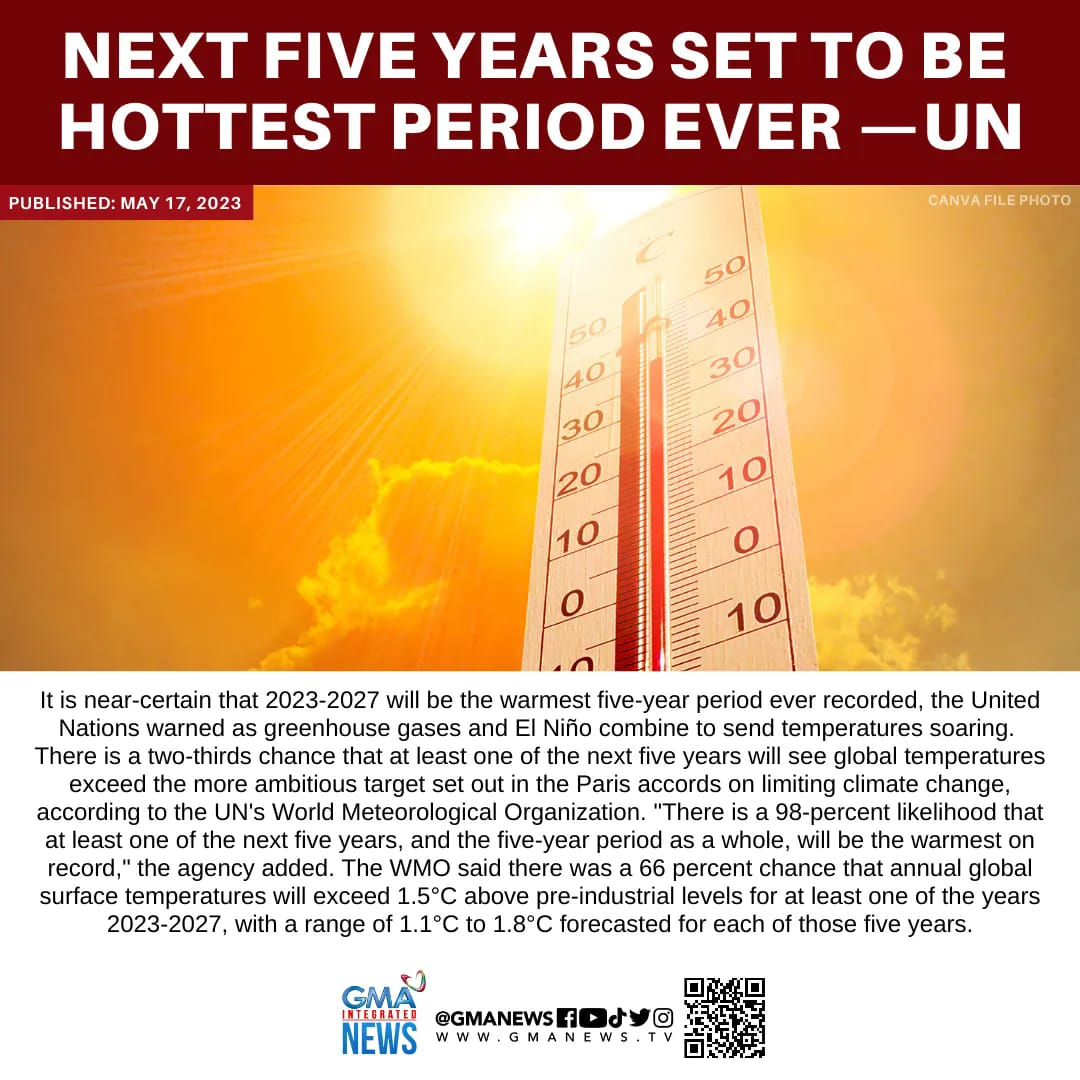

In [60]:
result = run(test_imgs[14])

In [124]:
result

tensor([[0.43319, 0.56681]], device='cuda:0')